# Importing necessary Libraries

In [178]:
# http://aclweb.org/anthology/Q16-1005
# https://www.cs.purdue.edu/homes/dgoldwas/papers/JGACL17.pdf 

In [4]:
# import pandas library for data management
# import Stanford Core NLP for data analisys
            
import pandas as pd
from pycorenlp import StanfordCoreNLP
import numpy as np

In [2]:
# setup StanfordCoreNlp
# Run the server using all jars in the current directory (e.g., the CoreNLP home directory)
# java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 15000
nlp = StanfordCoreNLP('http://localhost:9000')

# Load training data

In [8]:
train_data = pd.read_excel('..\\dataset\\train_annotated.xlsx')

In [9]:
train_data

,ID,Statement,Subject,Label,Context,Word POS,POS,Word Count,Sentiment,Sentiment Value,Bigram,Trigram
0,2635.json,Says the Annies List political group supports ...,abortion,False,a mailer,Says/VBZ the/DT Annies/NNPS List/VBP political...,"['<s>', 'VBZ', 'DT', 'NNPS', 'VBP', 'JJ', 'NN'...",12,Negative,1,"['<s> VBZ', 'VBZ DT', 'DT NNPS', 'NNPS VBP', '...","['<s> VBZ DT', 'VBZ DT NNPS', 'DT NNPS VBP', '..."
1,10540.json,When did the decline of coal start? It started...,"energy,history,job-accomplishments",half-true,a floor speech.,When/WRB did/VBD the/DT decline/NN of/IN coal/...,"['<s>', 'WRB', 'VBD', 'DT', 'NN', 'IN', 'NN', ...",28,Neutral,2,"['<s> WRB', 'WRB VBD', 'VBD DT', 'DT NN', 'NN ...","['<s> WRB VBD', 'WRB VBD DT', 'VBD DT NN', 'DT..."
2,324.json,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,mostly-true,Denver,Hillary/NNP Clinton/NNP agrees/VBZ with/IN Joh...,"['<s>', 'NNP', 'NNP', 'VBZ', 'IN', 'NNP', 'NNP...",22,Negative,1,"['<s> NNP', 'NNP NNP', 'NNP VBZ', 'VBZ IN', 'I...","['<s> NNP NNP', 'NNP NNP VBZ', 'NNP VBZ IN', '..."
3,1123.json,Health care reform legislation is likely to ma...,health-care,False,a news release,Health/NNP care/NN reform/NN legislation/NN is...,"['<s>', 'NNP', 'NN', 'NN', 'NN', 'VBZ', 'JJ', ...",13,Negative,1,"['<s> NNP', 'NNP NN', 'NN NN', 'NN NN', 'NN VB...","['<s> NNP NN', 'NNP NN NN', 'NN NN NN', 'NN NN..."
4,9028.json,The economic turnaround started at the end of ...,"economy,jobs",half-true,an interview on CNN,The/DT economic/JJ turnaround/NN started/VBD a...,"['<s>', 'DT', 'JJ', 'NN', 'VBD', 'IN', 'DT', '...",11,Neutral,2,"['<s> DT', 'DT JJ', 'JJ NN', 'NN VBD', 'VBD IN...","['<s> DT JJ', 'DT JJ NN', 'JJ NN VBD', 'NN VBD..."
5,12465.json,The Chicago Bears have had more starting quart...,education,True,a an online opinion-piece,The/DT Chicago/NNP Bears/NNPS have/VBP had/VBN...,"['<s>', 'DT', 'NNP', 'NNPS', 'VBP', 'VBN', 'RB...",30,Negative,1,"['<s> DT', 'DT NNP', 'NNP NNPS', 'NNPS VBP', '...","['<s> DT NNP', 'DT NNP NNPS', 'NNP NNPS VBP', ..."
6,2342.json,Jim Dunnam has not lived in the district he re...,candidates-biography,barely-true,a press release.,Jim/NNP Dunnam/NNP has/VBZ not/RB lived/VBN in...,"['<s>', 'NNP', 'NNP', 'VBZ', 'RB', 'VBN', 'IN'...",14,Negative,1,"['<s> NNP', 'NNP NNP', 'NNP VBZ', 'VBZ RB', 'R...","['<s> NNP NNP', 'NNP NNP VBZ', 'NNP VBZ RB', '..."
7,153.json,I'm the only person on this stage who has work...,ethics,half-true,"a Democratic debate in Philadelphia, Pa.",I/PRP 'm/VBP the/DT only/JJ person/NN on/IN th...,"['<s>', 'PRP', 'VBP', 'DT', 'JJ', 'NN', 'IN', ...",31,Negative,1,"['<s> PRP', 'PRP VBP', 'VBP DT', 'DT JJ', 'JJ ...","['<s> PRP VBP', 'PRP VBP DT', 'VBP DT JJ', 'DT..."
8,5602.json,"However, it took $19.5 million in Oregon Lotte...",jobs,half-true,a website,"However/RB ,/, it/PRP took/VBD $/$ 19.5/CD mil...","['<s>', 'RB', ',', 'PRP', 'VBD', '$', 'CD', 'C...",26,Neutral,2,"['<s> RB', 'RB ,', ', PRP', 'PRP VBD', 'VBD $'...","['<s> RB ,', 'RB , PRP', ', PRP VBD', 'PRP VBD..."
9,9741.json,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",mostly-true,an online video,Says/VBZ GOP/NNP primary/JJ opponents/NNS Glen...,"['<s>', 'VBZ', 'NNP', 'JJ', 'NNS', 'NNP', 'NNP...",23,Negative,1,"['<s> VBZ', 'VBZ NNP', 'NNP JJ', 'JJ NNS', 'NN...","['<s> VBZ NNP', 'VBZ NNP JJ', 'NNP JJ NNS', 'J..."


In [10]:
# Create a dictionary to represent data and better manipulation
data_dict =  dict()
data_dict['ids'] = train_data[['ID']].values[:,0]
data_dict['labels'] = train_data[['Label']].values[:,0]
data_dict['statements'] = train_data[['Statement']].values[:,0]
data_dict['subjects'] = train_data[['Subject']].values[:,0]
data_dict['contexts'] = train_data[['Context']].values[:,0]
data_dict['pos'] = train_data[['POS']].values[:,0]
data_dict['word_count'] = train_data[['Word Count']].values[:,0]
data_dict['sentiment'] = train_data[['Sentiment']].values[:,0]
data_dict['sentiment_value'] = train_data[['Sentiment Value']].values[:,0]
data_dict['pos_bigrams'] = train_data[['Bigram']].values[:,0]
data_dict['pos_trigrams'] = train_data[['Trigram']].values[:,0]

In [11]:
# Replace boolean values to str
data_dict['labels'] = np.array([x if x!= True else 'true' for x in data_dict['labels']])
data_dict['labels'] = np.array([x.lower() for x in data_dict['labels']])

In [12]:
data_dict['labels'][20:40]

array(['false', 'mostly-true', 'mostly-true', 'half-true', 'barely-true',
       'false', 'mostly-true', 'half-true', 'false', 'mostly-true',
       'true', 'barely-true', 'false', 'mostly-true', 'mostly-true',
       'true', 'true', 'true', 'pants-fire', 'true'], dtype='<U11')

In [13]:
new_labels = list()
for labels in data_dict['labels']:
    if labels in ['false','barely-true','pants-fire']:
        new_labels.append('false')
    else:
        new_labels.append('true')

In [14]:
# add a new column dividing statements into false and new
data_dict['new_labels'] = new_labels

In [509]:
redistributed_labels = list()
for labels in data_dict['labels']:
    if labels in ['false','barely-true','pants-fire']:
        redistributed_labels.append('false')
    elif labels in ['half-true']:
        redistributed_labels.append('half-true')
    else:
        redistributed_labels.append('true')

In [511]:
# add a new column dividing statements into false and true
data_dict['redistributed_labels'] = redistributed_labels

## Create a graph to visualize the distribution of statements given their labels

In [15]:
# import needed libraries first
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# create plot labels and values
statement_labels,statement_count = np.unique(data_dict['labels'], return_counts=True)

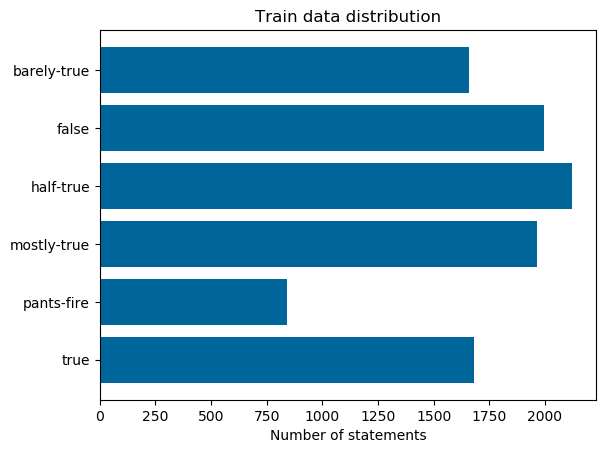

In [17]:
# create the plot itself
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(statement_labels))
ax.barh(y_pos, statement_count, align='center',
        color='#006699', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(statement_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of statements')
ax.set_title('Train data distribution')

plt.show()

In [18]:
# Consider two big group of data: True and False
false_statements = data_dict['statements'][[i for i,x in enumerate(data_dict['labels']) if x in ['false','barely-true','pants-fire']]]
true_statements = data_dict['statements'][[i for i,x in enumerate(data_dict['labels']) if x in ['true','mostly-true','half-true']]]

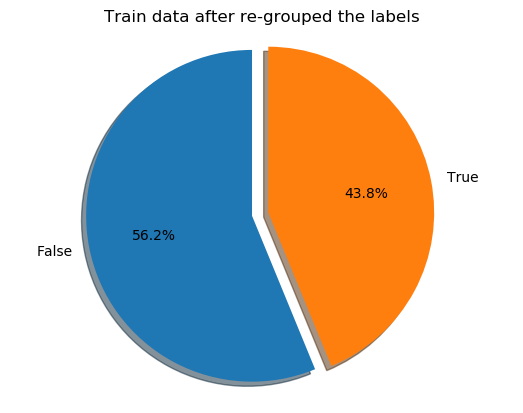

In [607]:
plt.rcdefaults()
fig, ax = plt.subplots()

#define labels
total = len(false_statements) + len(true_statements)
ax.set_title('Train data after re-grouped the labels')
# Pie with news labels distribution after grouped them by True or False labels
labels = 'False', 'True'
sizes = [(len(true_statements)*100)/total, (len(false_statements)*100)/total]
explode = (0, 0.1)

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [492]:
mostly_false_statements = data_dict['statements'][[i for i,x in enumerate(data_dict['labels']) if x in ['false','barely-true','pants-fire']]]
mostly_true_statements = data_dict['statements'][[i for i,x in enumerate(data_dict['labels']) if x in ['true','mostly-true']]]
half_true_false = data_dict['statements'][[i for i,x in enumerate(data_dict['labels']) if x in ['half-true']]]

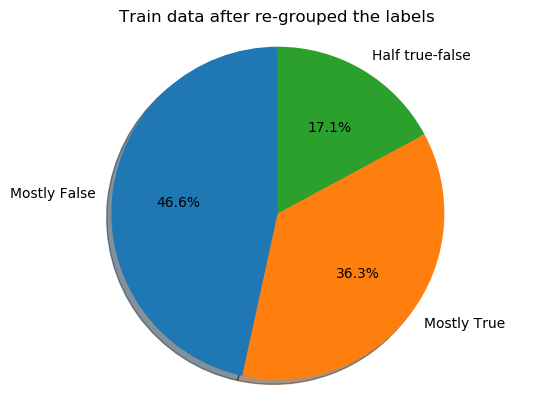

In [608]:
plt.rcdefaults()
fig, ax = plt.subplots()

#define labels
total = len(mostly_false_statements) + len(mostly_true_statements)+len(half_true_false)
ax.set_title('Train data after re-grouped the labels')
# Pie with news labels distribution after grouped them by True or False labels
labels = 'Mostly False', 'Mostly True', 'Half true-false'
sizes = [(len(true_statements)*100)/total, (len(false_statements)*100)/total, (len(half_true_false)*100)/total]
explode = (0, 0,0)

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Features selection

### POS unigram, bigram and trigram counts

In [20]:
# Preprocess all POS data. unigram, bigram, trigram wise
import ast
unigram_pos_list = list()
bigram_pos_list = list()
trigram_pos_list = list()

print('Procesing sentences')
for statement_id, statement in enumerate(data_dict['statements']):
    output = nlp.annotate(statement, properties={
      'annotators': 'tokenize,pos',
      'outputFormat': 'json'
      })
    result_pos = list()
    bigram_pos = list()
    trigram_pos = list()
    for o in output['sentences']:
        result_pos.append('<s>')
        for t in o['tokens']:
            result_pos.append('{0}'.format(t['pos']))
        for rpIndex, rp in enumerate(result_pos):
            if rpIndex < len(result_pos)-1 and len(result_pos)>=2:
                bigram_pos.append('{0} {1}'.format(rp, result_pos[rpIndex+1]))
            if rpIndex < len(result_pos)-2 and len(result_pos)>=3:
                trigram_pos.append('{0} {1} {2}'.format(rp, result_pos[rpIndex+1], result_pos[rpIndex+2]))
   
    unigram_pos_list.append(result_pos)
    bigram_pos_list.append(bigram_pos)
    trigram_pos_list.append(trigram_pos)

Procesing sentences


In [800]:
fourgrams_pos_list = list()
fivegrams_pos_list = list()
print('Procesing sentences')
for statement_id, statement in enumerate(data_dict['statements']):
    output = nlp.annotate(statement, properties={
      'annotators': 'tokenize,pos',
      'outputFormat': 'json'
      })
    result_pos = list()
    fourgrams_result = list()
    fivegrams_result = list()
    for o in output['sentences']:
        result_pos.append('<s>')
        for t in o['tokens']:
            result_pos.append('{0}'.format(t['pos']))
        for rpIndex, rp in enumerate(result_pos):
            if rpIndex < len(result_pos)-3 and len(result_pos)>=4:
                fourgrams_result.append('{0} {1} {2} {3}'.format(rp, result_pos[rpIndex+1],result_pos[rpIndex+2],result_pos[rpIndex+3]))
            if rpIndex < len(result_pos)-4 and len(result_pos)>=5:
                fivegrams_result.append('{0} {1} {2} {3} {4}'.format(rp, result_pos[rpIndex+1],result_pos[rpIndex+2],result_pos[rpIndex+3], result_pos[rpIndex+4]))
    fourgrams_pos_list.append(fourgrams_result)
    fivegrams_pos_list.append(fivegrams_result)

Procesing sentences


In [21]:
data_dict['pos'] = unigram_pos_list
data_dict['pos_bigrams'] = bigram_pos_list
data_dict['pos_trigrams'] = trigram_pos_list

In [801]:
data_dict['pos_fourgrams'] = fourgrams_pos_list
data_dict['pos_fivegrams'] = fivegrams_pos_list

In [22]:
unique_unigrams_pos = list()
unique_bigrams_pos = list()
unique_trigrams_pos = list()
for index, each_pos in enumerate(data_dict['pos']):
    for each_unigram in each_pos:
        if each_unigram not in unique_unigrams_pos:
            unique_unigrams_pos.append(each_unigram)
    for each_bigram in data_dict['pos_bigrams'][index]:
        if each_bigram not in unique_bigrams_pos:
            unique_bigrams_pos.append(each_bigram)
    for each_trigram in data_dict['pos_trigrams'][index]:
        if each_trigram not in unique_trigrams_pos:
            unique_trigrams_pos.append(each_trigram)

In [250]:
unique_fourgrams_pos = list()
unique_fivegrams_pos = list()
for index, each_pos in enumerate(data_dict['pos_fourgrams']):
    for each_fourgram in each_pos:
        if each_fourgram not in unique_fourgrams_pos:
            unique_fourgrams_pos.append(each_fourgram)
    for each_fivegram in data_dict['pos_fivegrams'][index]:
        if each_fivegram not in unique_fivegrams_pos:
            unique_fivegrams_pos.append(each_fivegram)

### Number of unique POS tags among all statements

##### Unigrams POS

In [563]:
len(unique_unigrams_pos)

46

##### Bigrams POS

In [564]:
len(unique_bigrams_pos)

1163

##### Tigrams POS

In [565]:
len(unique_trigrams_pos)

10838

#### Fourgram POS

In [566]:
len(unique_fourgrams_pos)

40572

#### Fivegram POS

In [567]:
len(unique_fivegrams_pos)

84923

### Count POS tags grouped by labels

In [601]:
pos_counts = dict()
pos_counts['false'] = dict()
pos_counts['true'] = dict()
pos_counts['half-true'] = dict()
pos_counts['false']['unigrams'] = dict()
pos_counts['false']['bigrams'] = dict()
pos_counts['false']['trigrams'] = dict()
pos_counts['true']['unigrams'] = dict()
pos_counts['true']['bigrams'] = dict()
pos_counts['true']['trigrams'] = dict()
pos_counts['false']['fourgrams'] = dict()
pos_counts['false']['fivegrams'] = dict()
pos_counts['true']['fourgrams'] = dict()
pos_counts['true']['fivegrams'] = dict()
pos_counts['half-true']['unigrams'] = dict()
pos_counts['half-true']['bigrams'] = dict()
pos_counts['half-true']['trigrams'] = dict()
pos_counts['half-true']['fourgrams'] = dict()
pos_counts['half-true']['fivegrams'] = dict()

In [602]:
# initialize all dictionaries
for each_unigram in unique_unigrams_pos:
    pos_counts['true']['unigrams'][each_unigram] = 0
    pos_counts['false']['unigrams'][each_unigram] = 0
    pos_counts['half-true']['unigrams'][each_unigram] = 0
    
for each_bigram in unique_bigrams_pos:
    pos_counts['true']['bigrams'][each_bigram] = 0
    pos_counts['false']['bigrams'][each_bigram] = 0
    pos_counts['half-true']['bigrams'][each_bigram] = 0
    
for each_trigram in unique_trigrams_pos:
    pos_counts['true']['trigrams'][each_trigram] = 0
    pos_counts['false']['trigrams'][each_trigram] = 0
    pos_counts['half-true']['trigrams'][each_trigram] = 0

# initialize fourgrams and fivegrams counting
for each_fourgram in unique_fourgrams_pos:
    pos_counts['true']['fourgrams'][each_fourgram] = 0
    pos_counts['false']['fourgrams'][each_fourgram] = 0
    pos_counts['half-true']['fourgrams'][each_fourgram]=0
for each_fivegram in unique_fivegrams_pos:
    pos_counts['true']['fivegrams'][each_fivegram] = 0
    pos_counts['false']['fivegrams'][each_fivegram] = 0
    pos_counts['half-true']['fivegrams'][each_fivegram] = 0

In [603]:
# count
for index, label in enumerate(data_dict['redistributed_labels'] ):
    for each_unigram in data_dict['pos'][index]:
        pos_counts[label]['unigrams'][each_unigram] += 1
    for each_bigram in data_dict['pos_bigrams'][index]:
        pos_counts[label]['bigrams'][each_bigram] +=1
    for each_trigram in data_dict['pos_trigrams'][index]:
        pos_counts[label]['trigrams'][each_trigram] +=1
    for each_fourgram in data_dict['pos_fourgrams'][index]:
        pos_counts[label]['fourgrams'][each_fourgram] +=1
    for each_fivegram in data_dict['pos_fivegrams'][index]:
        pos_counts[label]['fivegrams'][each_fivegram] +=1

In [609]:
# Pos unigrams
false_unigram_pairs = list()
elements = pos_counts['false']['unigrams']
for item in elements:
    false_unigram_pairs.append((elements[item], item))

# Pos bigrams    
false_bigram_pairs = list()
elements = pos_counts['false']['bigrams']
for item in elements:
    false_bigram_pairs.append((elements[item], item))
    
# Pos trigrams
false_trigram_pairs = list()
elements = pos_counts['false']['trigrams']
for item in elements:
    false_trigram_pairs.append((elements[item], item))
# Pos fourgrams
false_fourgram_pairs =  list()
elements = pos_counts['false']['fourgrams']
for item in elements:
    false_fourgram_pairs.append((elements[item], item))
    
# Pos fivegrams
false_fivegram_pairs = list()
elements = pos_counts['false']['fivegrams']
for item in elements:
    false_fivegram_pairs.append((elements[item], item))

In [610]:
# Pos unigrams
true_unigram_pairs = list()
elements = pos_counts['true']['unigrams']
for item in elements:
    true_unigram_pairs.append((elements[item], item))
    
# Pos bigrams
true_bigram_pairs = list()
elements = pos_counts['true']['bigrams']
for item in elements:
    true_bigram_pairs.append((elements[item], item))
    
# Pos trigrams
true_trigram_pairs = list()
elements = pos_counts['true']['trigrams']
for item in elements:
    true_trigram_pairs.append((elements[item], item))
# Pos fourgrams
true_fourgram_pairs = list()
elements = pos_counts['true']['fourgrams']
for item in elements:
    true_fourgram_pairs.append((elements[item], item))
    
# Pos fivegrams
true_fivegram_pairs = list()
elements = pos_counts['true']['fivegrams']
for item in elements:
    true_fivegram_pairs.append((elements[item], item))

In [611]:
# Pos unigrams
half_true_unigram_pairs = list()
elements = pos_counts['half-true']['unigrams']
for item in elements:
    half_true_unigram_pairs.append((elements[item], item))
    
# Pos bigrams
half_true_bigram_pairs = list()
elements = pos_counts['half-true']['bigrams']
for item in elements:
    half_true_bigram_pairs.append((elements[item], item))
    
# Pos trigrams
half_true_trigram_pairs = list()
elements = pos_counts['half-true']['trigrams']
for item in elements:
    half_true_trigram_pairs.append((elements[item], item))

# Pos fourgrams
half_true_fourgram_pairs = list()
elements = pos_counts['half-true']['fourgrams']
for item in elements:
    half_true_fourgram_pairs.append((elements[item], item))
    
# Pos fivegrams
half_true_fivegram_pairs = list()
elements = pos_counts['half-true']['fivegrams']
for item in elements:
    half_true_fivegram_pairs.append((elements[item], item))

### Number of unigram POS tags by label

#### FALSE

In [583]:
false_unigram_pairs
total_false_unigrams = sum([x[0] for x in false_unigram_pairs])
total_false_unigrams

92272

In [584]:
false_bigram_pairs
total_false_bigrams = sum([x[0] for x in false_bigram_pairs])
total_false_bigrams

95818

In [585]:
false_trigram_pairs
total_false_trigrams = sum([x[0] for x in false_trigram_pairs])
total_false_trigrams

90874

In [586]:
false_fourgram_pairs
total_false_fourgrams = sum([x[0] for x in false_fourgram_pairs])
total_false_fourgrams

85930

In [587]:
false_fivegram_pairs
total_false_fivegrams = sum([x[0] for x in false_fivegram_pairs])
total_false_fivegrams

80994

#### TRUE

In [588]:
true_unigram_pairs
total_true_unigrams = sum([x[0] for x in true_unigram_pairs])
total_true_unigrams

77911

In [589]:
true_bigram_pairs
total_true_bigrams = sum([x[0] for x in true_bigram_pairs])
total_true_bigrams

82096

In [590]:
true_trigram_pairs
total_true_trigrams = sum([x[0] for x in true_trigram_pairs])
total_true_trigrams

78002

In [591]:
true_fourgram_pairs
total_true_fourgrams = sum([x[0] for x in true_fourgram_pairs])
total_true_fourgrams

73908

In [592]:
true_fivegram_pairs
total_true_fivegrams = sum([x[0] for x in true_fivegram_pairs])
total_true_fivegrams

69818

### Normalize counting

In [619]:
false_unigram_pairs_normalized = [(x[0]/len(mostly_false_statements),x[1]) for x in false_unigram_pairs]
#false_unigram_pairs_normalized = [((x[0]-min(false_unigram_pairs_normalized)[0])/(max(false_unigram_pairs_normalized)[0] - min(false_unigram_pairs_normalized)[0]),x[1]) for x in false_unigram_pairs_normalized]
false_unigram_pairs_normalized

#len(half_true_false)+len(mostly_true_statements)
#len(mostly_true_statements)
#len(mostly_false_statements)

[(1.0993995997331554, '<s>'),
 (0.7211474316210807, 'VBZ'),
 (1.5219034912163665, 'DT'),
 (0.1289748721369802, 'NNPS'),
 (0.3533466755614854, 'VBP'),
 (1.0469201690015566, 'JJ'),
 (2.8109851011785634, 'NN'),
 (1.2234823215476984, 'NNS'),
 (2.127418278852568, 'IN'),
 (1.0644874360684902, '.'),
 (0.057371581054036024, 'WRB'),
 (0.6195241271959084, 'VBD'),
 (0.583944852123638, 'VB'),
 (0.4227262619524127, 'PRP'),
 (0.06626639982210362, 'RP'),
 (0.09561930175672671, 'WDT'),
 (0.4769846564376251, 'TO'),
 (0.09939959973315543, '-LRB-'),
 (2.2305981765621525, 'NNP'),
 (0.09939959973315543, '-RRB-'),
 (0.05047809650878363, '``'),
 (0.3295530353569046, 'VBG'),
 (0.05181231932399377, "''"),
 (0.23282188125416944, 'PRP$'),
 (0.393818100956193, 'VBN'),
 (0.028241049588614633, 'RBR'),
 (0.6308650211251946, 'CD'),
 (0.5343562374916611, 'RB'),
 (0.059150544807649544, 'WP'),
 (0.48432288192128087, ','),
 (0.047809650878363356, 'JJS'),
 (0.11474316210807205, '$'),
 (0.3224371803424505, 'CC'),
 (0.07605

In [620]:
false_bigram_pairs_normalized = [(x[0]/len(mostly_false_statements),x[1]) for x in false_bigram_pairs]
false_bigram_pairs_normalized

[(0.26039581943517903, '<s> VBZ'),
 (0.1291972426061819, 'VBZ DT'),
 (0.017567267066933512, 'DT NNPS'),
 (0.01645541472092506, 'NNPS VBP'),
 (0.02068045363575717, 'VBP JJ'),
 (0.5327996442072492, 'JJ NN'),
 (0.14587502779630865, 'NN VBZ'),
 (0.039137202579497446, 'VBZ JJ'),
 (0.24416277518345564, 'JJ NNS'),
 (0.3497887480542584, 'NNS IN'),
 (0.2941961307538359, 'IN NN'),
 (0.48387814098287746, 'NN .'),
 (0.02334889926617745, '<s> WRB'),
 (0.0011118523460084502, 'WRB VBD'),
 (0.13875917278185457, 'VBD DT'),
 (0.6915721592172559, 'DT NN'),
 (0.7327106960195686, 'NN IN'),
 (0.00911718923726929, 'NN VB'),
 (0.017567267066933512, 'VB .'),
 (0.12141427618412275, '. <s>'),
 (0.10518123193239938, '<s> PRP'),
 (0.14387369357349344, 'PRP VBD'),
 (0.0024460751612185904, 'VBD WRB'),
 (0.004669779853235491, 'WRB JJ'),
 (0.08205470313542361, 'NN VBD'),
 (0.0155659328441183, 'VBD RP'),
 (0.0, 'RP WDT'),
 (0.020458083166555483, 'WDT VBD'),
 (0.04825439181676673, 'VBD TO'),
 (0.31976873471203027, 'TO V

In [621]:
false_trigram_pairs_normalized = [(x[0]/len(mostly_false_statements),x[1]) for x in false_trigram_pairs]
false_trigram_pairs_normalized

[(0.033800311318656885, '<s> VBZ DT'),
 (0.00066711140760507, 'VBZ DT NNPS'),
 (0.00355792750722704, 'DT NNPS VBP'),
 (0.00133422281521014, 'NNPS VBP JJ'),
 (0.00644874360684901, 'VBP JJ NN'),
 (0.0266844563042028, 'JJ NN VBZ'),
 (0.009784300644874361, 'NN VBZ JJ'),
 (0.00533689126084056, 'VBZ JJ NNS'),
 (0.06293084278407828, 'JJ NNS IN'),
 (0.049143873693573495, 'NNS IN NN'),
 (0.052924171670002226, 'IN NN .'),
 (0.0011118523460084502, '<s> WRB VBD'),
 (0.00044474093840338, 'WRB VBD DT'),
 (0.06070713809206137, 'VBD DT NN'),
 (0.22570602623971536, 'DT NN IN'),
 (0.10140093395597065, 'NN IN NN'),
 (0.00022237046920169, 'IN NN VB'),
 (0.0, 'NN VB .'),
 (0.00133422281521014, 'VB . <s>'),
 (0.032021347565043365, '. <s> PRP'),
 (0.03669112741827885, '<s> PRP VBD'),
 (0.00155659328441183, 'PRP VBD WRB'),
 (0.0, 'VBD WRB JJ'),
 (0.00133422281521014, 'WRB JJ NN'),
 (0.01289748721369802, 'JJ NN VBD'),
 (0.00088948187680676, 'NN VBD RP'),
 (0.0, 'VBD RP WDT'),
 (0.0, 'RP WDT VBD'),
 (0.00111185

In [623]:
false_fourgram_pairs_normalized = [(x[0]/len(mostly_false_statements),x[1]) for x in false_fourgram_pairs]
false_fourgram_pairs_normalized

[(0.00044474093840338, '<s> VBZ DT NNPS'),
 (0.00044474093840338, 'VBZ DT NNPS VBP'),
 (0.00044474093840338, 'DT NNPS VBP JJ'),
 (0.00044474093840338, 'NNPS VBP JJ NN'),
 (0.00066711140760507, 'VBP JJ NN VBZ'),
 (0.00088948187680676, 'JJ NN VBZ JJ'),
 (0.00177896375361352, 'NN VBZ JJ NNS'),
 (0.00177896375361352, 'VBZ JJ NNS IN'),
 (0.0066711140760507, 'JJ NNS IN NN'),
 (0.00778296642205915, 'NNS IN NN .'),
 (0.00044474093840338, '<s> WRB VBD DT'),
 (0.0, 'WRB VBD DT NN'),
 (0.022904158327774073, 'VBD DT NN IN'),
 (0.03313319991105181, 'DT NN IN NN'),
 (0.0, 'NN IN NN VB'),
 (0.0, 'IN NN VB .'),
 (0.0, 'NN VB . <s>'),
 (0.00066711140760507, 'VB . <s> PRP'),
 (0.013564598621303091, '. <s> PRP VBD'),
 (0.0, '<s> PRP VBD WRB'),
 (0.0, 'PRP VBD WRB JJ'),
 (0.0, 'VBD WRB JJ NN'),
 (0.0, 'WRB JJ NN VBD'),
 (0.0, 'JJ NN VBD RP'),
 (0.0, 'NN VBD RP WDT'),
 (0.0, 'VBD RP WDT VBD'),
 (0.0, 'RP WDT VBD TO'),
 (0.00044474093840338, 'WDT VBD TO VB'),
 (0.00289081609962197, 'VBD TO VB IN'),
 (0.0002

In [624]:
false_fivegram_pairs_normalized = [(x[0]/len(mostly_false_statements),x[1]) for x in false_fivegram_pairs]
false_fivegram_pairs_normalized

[(0.00022237046920169, '<s> VBZ DT NNPS VBP'),
 (0.00022237046920169, 'VBZ DT NNPS VBP JJ'),
 (0.00022237046920169, 'DT NNPS VBP JJ NN'),
 (0.00022237046920169, 'NNPS VBP JJ NN VBZ'),
 (0.00022237046920169, 'VBP JJ NN VBZ JJ'),
 (0.00022237046920169, 'JJ NN VBZ JJ NNS'),
 (0.00066711140760507, 'NN VBZ JJ NNS IN'),
 (0.00022237046920169, 'VBZ JJ NNS IN NN'),
 (0.00155659328441183, 'JJ NNS IN NN .'),
 (0.0, '<s> WRB VBD DT NN'),
 (0.0, 'WRB VBD DT NN IN'),
 (0.00355792750722704, 'VBD DT NN IN NN'),
 (0.0, 'DT NN IN NN VB'),
 (0.0, 'NN IN NN VB .'),
 (0.0, 'IN NN VB . <s>'),
 (0.0, 'NN VB . <s> PRP'),
 (0.00022237046920169, 'VB . <s> PRP VBD'),
 (0.0, '. <s> PRP VBD WRB'),
 (0.0, '<s> PRP VBD WRB JJ'),
 (0.0, 'PRP VBD WRB JJ NN'),
 (0.0, 'VBD WRB JJ NN VBD'),
 (0.0, 'WRB JJ NN VBD RP'),
 (0.0, 'JJ NN VBD RP WDT'),
 (0.0, 'NN VBD RP WDT VBD'),
 (0.0, 'VBD RP WDT VBD TO'),
 (0.0, 'RP WDT VBD TO VB'),
 (0.0, 'WDT VBD TO VB IN'),
 (0.0, 'VBD TO VB IN -LRB-'),
 (0.0, 'TO VB IN -LRB- NNP'),
 (0

In [625]:
true_unigram_pairs_normalized = [(x[0]/len(mostly_true_statements),x[1]) for x in true_unigram_pairs]
true_unigram_pairs_normalized

[(1.1219512195121952, '<s>'),
 (0.6758015894765689, 'VBZ'),
 (1.6771718278980543, 'DT'),
 (0.1425047958344752, 'NNPS'),
 (0.43820224719101125, 'VBP'),
 (1.1633324198410524, 'JJ'),
 (2.9945190463140587, 'NN'),
 (1.3165250753631133, 'NNS'),
 (2.4360098657166347, 'IN'),
 (1.096464784872568, '.'),
 (0.06083858591394903, 'WRB'),
 (0.5889284735543985, 'VBD'),
 (0.4571115374075089, 'VB'),
 (0.43573581803233763, 'PRP'),
 (0.0542614414908194, 'RP'),
 (0.08796930665935873, 'WDT'),
 (0.3833927103315977, 'TO'),
 (0.10523431077007399, '-LRB-'),
 (1.8210468621540148, 'NNP'),
 (0.10550835845437107, '-RRB-'),
 (0.043573581803233764, '``'),
 (0.2650041107152645, 'VBG'),
 (0.04521786790901617, "''"),
 (0.21978624280624828, 'PRP$'),
 (0.43957248561249657, 'VBN'),
 (0.04466977254042203, 'RBR'),
 (0.89065497396547, 'CD'),
 (0.627569197040285, 'RB'),
 (0.05837215675527542, 'WP'),
 (0.5250753631131817, ','),
 (0.0975609756097561, 'JJS'),
 (0.12496574403946287, '$'),
 (0.35571389421759386, 'CC'),
 (0.14551932

In [626]:
true_bigram_pairs_normalized = [(x[0]/len(mostly_true_statements),x[1]) for x in true_bigram_pairs]
true_bigram_pairs_normalized

[(0.2019731433269389, '<s> VBZ'),
 (0.11098931214031242, 'VBZ DT'),
 (0.011784050424773911, 'DT NNPS'),
 (0.02877500685119211, 'NNPS VBP'),
 (0.026308577692518497, 'VBP JJ'),
 (0.5820772814469718, 'JJ NN'),
 (0.1570293231022198, 'NN VBZ'),
 (0.03590024664291587, 'VBZ JJ'),
 (0.263085776925185, 'JJ NNS'),
 (0.4044943820224719, 'NNS IN'),
 (0.340093176212661, 'IN NN'),
 (0.5171279802685668, 'NN .'),
 (0.02384214853384489, '<s> WRB'),
 (0.0, 'WRB VBD'),
 (0.11948479035352151, 'VBD DT'),
 (0.7667854206631954, 'DT NN'),
 (0.8602356810084955, 'NN IN'),
 (0.00822143052891203, 'NN VB'),
 (0.016990956426418197, 'VB .'),
 (0.15072622636338723, '. <s>'),
 (0.11126335982460948, '<s> PRP'),
 (0.1594957522608934, 'PRP VBD'),
 (0.002466429158673609, 'VBD WRB'),
 (0.004932858317347218, 'WRB JJ'),
 (0.08084406686763497, 'NN VBD'),
 (0.012880241161962182, 'VBD RP'),
 (0.0, 'RP WDT'),
 (0.016990956426418197, 'WDT VBD'),
 (0.039462866538777744, 'VBD TO'),
 (0.23759934228555768, 'TO VB'),
 (0.0564538229651

In [627]:
true_trigram_pairs_normalized = [(x[0]/len(mostly_true_statements),x[1]) for x in true_trigram_pairs]
true_trigram_pairs_normalized

[(0.024116196218141955, '<s> VBZ DT'),
 (0.0005480953685941354, 'VBZ DT NNPS'),
 (0.0027404768429706767, 'DT NNPS VBP'),
 (0.001644286105782406, 'NNPS VBP JJ'),
 (0.00356261989586188, 'VBP JJ NN'),
 (0.0271307207454097, 'JJ NN VBZ'),
 (0.00822143052891203, 'NN VBZ JJ'),
 (0.005206906001644286, 'VBZ JJ NNS'),
 (0.0696081118114552, 'JJ NNS IN'),
 (0.05453548917511647, 'NNS IN NN'),
 (0.05700191833379008, 'IN NN .'),
 (0.0, '<s> WRB VBD'),
 (0.0, 'WRB VBD DT'),
 (0.05398739380652234, 'VBD DT NN'),
 (0.2485612496574404, 'DT NN IN'),
 (0.11564812277336256, 'NN IN NN'),
 (0.0002740476842970677, 'IN NN VB'),
 (0.0005480953685941354, 'NN VB .'),
 (0.0019183337900794738, 'VB . <s>'),
 (0.03315976979994519, '. <s> PRP'),
 (0.036996437380104136, '<s> PRP VBD'),
 (0.0005480953685941354, 'PRP VBD WRB'),
 (0.0, 'VBD WRB JJ'),
 (0.000822143052891203, 'WRB JJ NN'),
 (0.012332145793368046, 'JJ NN VBD'),
 (0.001644286105782406, 'NN VBD RP'),
 (0.0, 'VBD RP WDT'),
 (0.0, 'RP WDT VBD'),
 (0.00027404768429

In [628]:
true_fourgram_pairs_normalized = [(x[0]/len(mostly_true_statements),x[1]) for x in true_fourgram_pairs]
true_fourgram_pairs_normalized

[(0.0005480953685941354, '<s> VBZ DT NNPS'),
 (0.0, 'VBZ DT NNPS VBP'),
 (0.0005480953685941354, 'DT NNPS VBP JJ'),
 (0.0005480953685941354, 'NNPS VBP JJ NN'),
 (0.0, 'VBP JJ NN VBZ'),
 (0.0013702384214853384, 'JJ NN VBZ JJ'),
 (0.000822143052891203, 'NN VBZ JJ NNS'),
 (0.0019183337900794738, 'VBZ JJ NNS IN'),
 (0.011510002740476843, 'JJ NNS IN NN'),
 (0.006029049054535489, 'NNS IN NN .'),
 (0.0, '<s> WRB VBD DT'),
 (0.0, 'WRB VBD DT NN'),
 (0.02384214853384489, 'VBD DT NN IN'),
 (0.0356261989586188, 'DT NN IN NN'),
 (0.0, 'NN IN NN VB'),
 (0.0, 'IN NN VB .'),
 (0.0002740476842970677, 'NN VB . <s>'),
 (0.0002740476842970677, 'VB . <s> PRP'),
 (0.01534667032063579, '. <s> PRP VBD'),
 (0.0, '<s> PRP VBD WRB'),
 (0.0, 'PRP VBD WRB JJ'),
 (0.0, 'VBD WRB JJ NN'),
 (0.0, 'WRB JJ NN VBD'),
 (0.0, 'JJ NN VBD RP'),
 (0.0, 'NN VBD RP WDT'),
 (0.0, 'VBD RP WDT VBD'),
 (0.0, 'RP WDT VBD TO'),
 (0.0, 'WDT VBD TO VB'),
 (0.0030145245272677444, 'VBD TO VB IN'),
 (0.0002740476842970677, 'TO VB IN -LRB

In [629]:
true_fivegram_pairs_normalized = [(x[0]/len(mostly_true_statements),x[1]) for x in true_fivegram_pairs]
true_fivegram_pairs_normalized

[(0.0, '<s> VBZ DT NNPS VBP'),
 (0.0, 'VBZ DT NNPS VBP JJ'),
 (0.0, 'DT NNPS VBP JJ NN'),
 (0.0, 'NNPS VBP JJ NN VBZ'),
 (0.0, 'VBP JJ NN VBZ JJ'),
 (0.0, 'JJ NN VBZ JJ NNS'),
 (0.0005480953685941354, 'NN VBZ JJ NNS IN'),
 (0.0002740476842970677, 'VBZ JJ NNS IN NN'),
 (0.002466429158673609, 'JJ NNS IN NN .'),
 (0.0, '<s> WRB VBD DT NN'),
 (0.0, 'WRB VBD DT NN IN'),
 (0.001644286105782406, 'VBD DT NN IN NN'),
 (0.0, 'DT NN IN NN VB'),
 (0.0, 'NN IN NN VB .'),
 (0.0, 'IN NN VB . <s>'),
 (0.0, 'NN VB . <s> PRP'),
 (0.0, 'VB . <s> PRP VBD'),
 (0.0, '. <s> PRP VBD WRB'),
 (0.0, '<s> PRP VBD WRB JJ'),
 (0.0, 'PRP VBD WRB JJ NN'),
 (0.0, 'VBD WRB JJ NN VBD'),
 (0.0, 'WRB JJ NN VBD RP'),
 (0.0, 'JJ NN VBD RP WDT'),
 (0.0, 'NN VBD RP WDT VBD'),
 (0.0, 'VBD RP WDT VBD TO'),
 (0.0, 'RP WDT VBD TO VB'),
 (0.0, 'WDT VBD TO VB IN'),
 (0.0, 'VBD TO VB IN -LRB-'),
 (0.0, 'TO VB IN -LRB- NNP'),
 (0.0, 'VB IN -LRB- NNP NNP'),
 (0.0005480953685941354, 'IN -LRB- NNP NNP NNP'),
 (0.0019183337900794738, '-L

### Define type and name for grams and order them

In [639]:
dtype = [('count', float), ('name', 'U30')]
ordered_false_unigrams = np.flip(np.sort(np.array(false_unigram_pairs_normalized, dtype=dtype),order='count'))

In [640]:
ordered_false_unigrams

array([(2.81098510e+00, 'NN'), (2.23059818e+00, 'NNP'),
       (2.12741828e+00, 'IN'), (1.52190349e+00, 'DT'),
       (1.22348232e+00, 'NNS'), (1.09939960e+00, '<s>'),
       (1.06448744e+00, '.'), (1.04692017e+00, 'JJ'),
       (7.21147432e-01, 'VBZ'), (6.30865021e-01, 'CD'),
       (6.19524127e-01, 'VBD'), (5.83944852e-01, 'VB'),
       (5.34356237e-01, 'RB'), (4.84322882e-01, ','),
       (4.76984656e-01, 'TO'), (4.22726262e-01, 'PRP'),
       (3.93818101e-01, 'VBN'), (3.53346676e-01, 'VBP'),
       (3.29553035e-01, 'VBG'), (3.22437180e-01, 'CC'),
       (2.32821881e-01, 'PRP$'), (1.72337114e-01, 'MD'),
       (1.28974872e-01, 'NNPS'), (1.14743162e-01, '$'),
       (9.93995997e-02, '-RRB-'), (9.93995997e-02, '-LRB-'),
       (9.56193018e-02, 'WDT'), (7.60507005e-02, 'JJR'),
       (6.96019569e-02, ':'), (6.62663998e-02, 'RP'),
       (5.91505448e-02, 'WP'), (5.73715811e-02, 'WRB'),
       (5.18123193e-02, "''"), (5.04780965e-02, '``'),
       (4.78096509e-02, 'JJS'), (2.82410496e-02

In [641]:
ordered_false_bigrams = np.flip(np.sort(np.array(false_bigram_pairs_normalized, dtype=dtype),order='count'))
ordered_false_bigrams

array([(0.91460974, 'NNP NNP'), (0.7327107 , 'NN IN'),
       (0.69157216, 'DT NN'), ..., (0.        , "'' NNP"),
       (0.        , "'' :"), (0.        , "'' $")],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [642]:
ordered_false_trigrams = np.flip(np.sort(np.array(false_trigram_pairs_normalized, dtype=dtype),order='count'))
ordered_false_trigrams

array([(0.26617745, 'IN DT NN'), (0.24238381, 'DT JJ NN'),
       (0.22570603, 'DT NN IN'), ..., (0.        , '$ CD RB'),
       (0.        , "$ CD ''"), (0.        , '# CD :')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [643]:
ordered_false_fourgrams = np.flip(np.sort(np.array(false_fourgram_pairs_normalized, dtype=dtype),order='count'))
ordered_false_fourgrams

array([(0.12408272, '<s> VBZ NNP NNP'), (0.0896153 , 'NN IN DT NN'),
       (0.08427841, 'IN DT JJ NN'), ..., (0.        , '$ CD , DT'),
       (0.        , "$ CD '' IN"), (0.        , '# CD : IN')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [644]:
ordered_false_fivegrams = np.flip(np.sort(np.array(false_fivegram_pairs_normalized, dtype=dtype),order='count'))
ordered_false_fivegrams

array([(0.04024905, '<s> VBZ NNP NNP VBD'),
       (0.03646876, '<s> VBZ NNP NNP NNP'),
       (0.02735157, '<s> VBZ NNP NNP VBZ'), ...,
       (0.        , '# CD IN NN NN'), (0.        , '# CD IN DT NNP'),
       (0.        , '# CD : IN DT')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [645]:
dtype = [('count', float), ('name','U30')]
ordered_true_unigrams = np.flip(np.sort(np.array(true_unigram_pairs_normalized, dtype=dtype),order='count'))

In [646]:
ordered_true_unigrams

array([(2.99451905e+00, 'NN'), (2.43600987e+00, 'IN'),
       (1.82104686e+00, 'NNP'), (1.67717183e+00, 'DT'),
       (1.31652508e+00, 'NNS'), (1.16333242e+00, 'JJ'),
       (1.12195122e+00, '<s>'), (1.09646478e+00, '.'),
       (8.90654974e-01, 'CD'), (6.75801589e-01, 'VBZ'),
       (6.27569197e-01, 'RB'), (5.88928474e-01, 'VBD'),
       (5.25075363e-01, ','), (4.57111537e-01, 'VB'),
       (4.39572486e-01, 'VBN'), (4.38202247e-01, 'VBP'),
       (4.35735818e-01, 'PRP'), (3.83392710e-01, 'TO'),
       (3.55713894e-01, 'CC'), (2.65004111e-01, 'VBG'),
       (2.19786243e-01, 'PRP$'), (1.45519320e-01, 'JJR'),
       (1.42504796e-01, 'NNPS'), (1.35653604e-01, 'MD'),
       (1.24965744e-01, '$'), (1.05508358e-01, '-RRB-'),
       (1.05234311e-01, '-LRB-'), (9.75609756e-02, 'JJS'),
       (8.79693067e-02, 'WDT'), (8.52288298e-02, ':'),
       (6.08385859e-02, 'WRB'), (5.83721568e-02, 'WP'),
       (5.42614415e-02, 'RP'), (4.52178679e-02, "''"),
       (4.46697725e-02, 'RBR'), (4.35735818e-0

In [647]:
ordered_true_bigrams = np.flip(np.sort(np.array(true_bigram_pairs_normalized, dtype=dtype),order='count'))
ordered_true_bigrams

array([(0.86023568, 'NN IN'), (0.82186901, 'IN DT'),
       (0.76678542, 'DT NN'), ..., (0.        , "'' #"),
       (0.        , '$ IN'), (0.        , '$ $')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [648]:
ordered_true_trigrams = np.flip(np.sort(np.array(true_trigram_pairs_normalized, dtype=dtype),order='count'))
ordered_true_trigrams

array([(0.34064127, 'IN DT NN'), (0.2781584 , 'NN IN DT'),
       (0.26993697, 'DT JJ NN'), ..., (0.        , '$ CD NNP'),
       (0.        , '$ CD -LRB-'), (0.        , '$ $ CD')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [649]:
ordered_true_fourgrams = np.flip(np.sort(np.array(true_fourgram_pairs_normalized, dtype=dtype),order='count'))
ordered_true_fourgrams

array([(0.12386955, 'NN IN DT NN'), (0.11537408, 'IN DT JJ NN'),
       (0.10304193, 'IN DT NN IN'), ..., (0.        , '$ CD , DT'),
       (0.        , '$ $ CD NN'), (0.        , '# CD IN NN')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [650]:
ordered_true_fivegrams = np.flip(np.sort(np.array(true_fivegram_pairs_normalized, dtype=dtype),order='count'))
ordered_true_fivegrams

array([(0.03891477, 'NN IN DT JJ NN'), (0.0356262 , 'IN DT NN IN DT'),
       (0.03425596, 'NN IN DT NN .'), ..., (0.        , '# CD IN NN NN'),
       (0.        , '# CD IN NN IN'), (0.        , '# CD IN DT CD')],
      dtype=[('count', '<f8'), ('name', '<U30')])

In [651]:
y_false_values = list()
y_true_values = list()
x_labels = [x[1] for x in ordered_true_unigrams]
for each_label in x_labels:
    y_false_values.append([x[0] for x in ordered_false_unigrams if x[1]==each_label][0])
    y_true_values.append([x[0] for x in ordered_true_unigrams if x[1]==each_label][0])

## Plot POS unigram wise

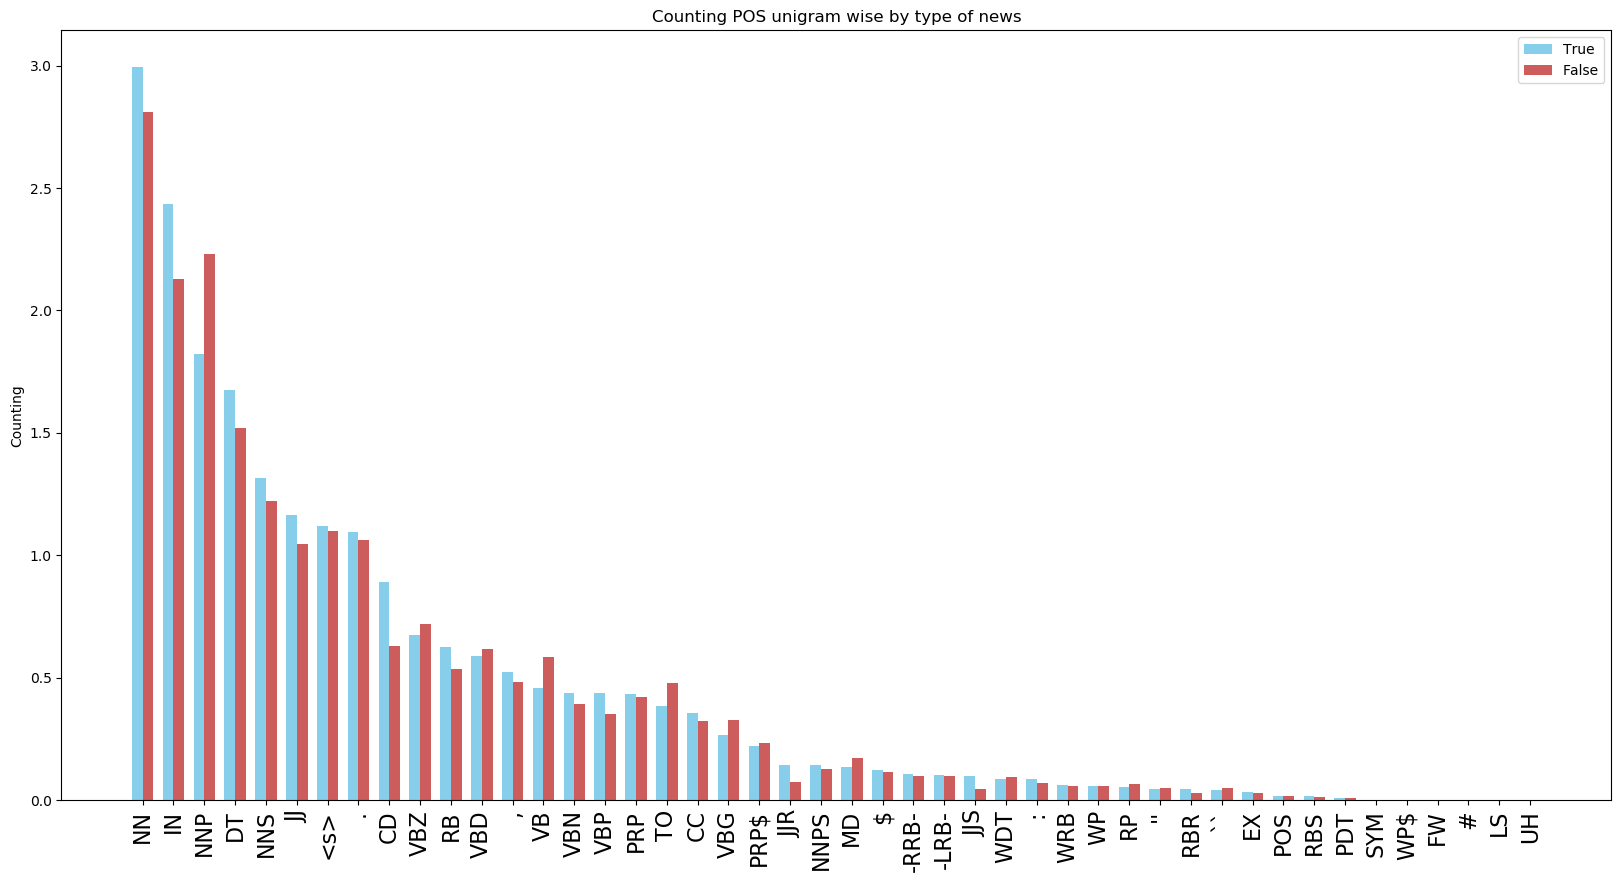

In [652]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_labels))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_values, width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_values, width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS unigram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_labels),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

## Plot POS bigram wise

In [653]:
# bigram counts
y_false_b_values = list()
y_true_b_values = list()
x_b_labels = [x[1] for x in ordered_false_bigrams]
for each_label in x_b_labels:
    y_false_b_values.append([x[0] for x in ordered_false_bigrams if x[1]==each_label][0])
    y_true_b_values.append([x[0] for x in ordered_true_bigrams if x[1]==each_label][0])

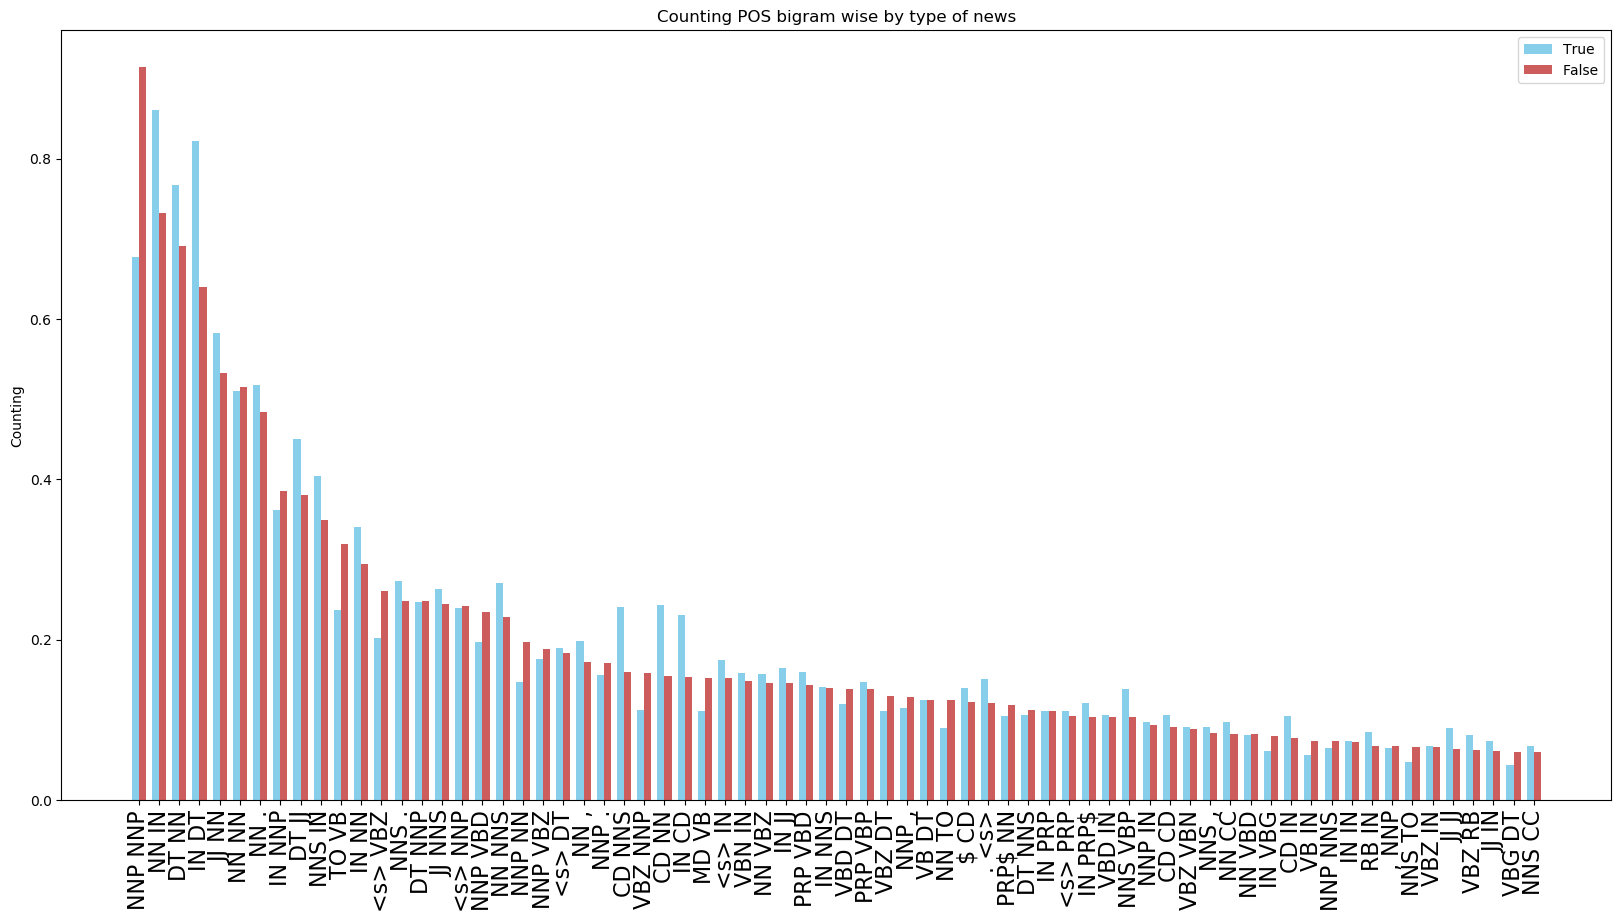

In [659]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_b_labels[:70]))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_b_values[:70], width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_b_values[:70], width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS bigram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_b_labels[:70]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

## Plot POS Trigram wise

In [660]:
# trigram counts
y_false_t_values = list()
y_true_t_values = list()
x_t_labels = [x[1] for x in ordered_false_trigrams[:300]]
for each_label in x_t_labels:
    y_false_t_values.append([x[0] for x in ordered_false_trigrams if x[1]==each_label][0])
    y_true_t_values.append([x[0] for x in ordered_true_trigrams if x[1]==each_label][0])

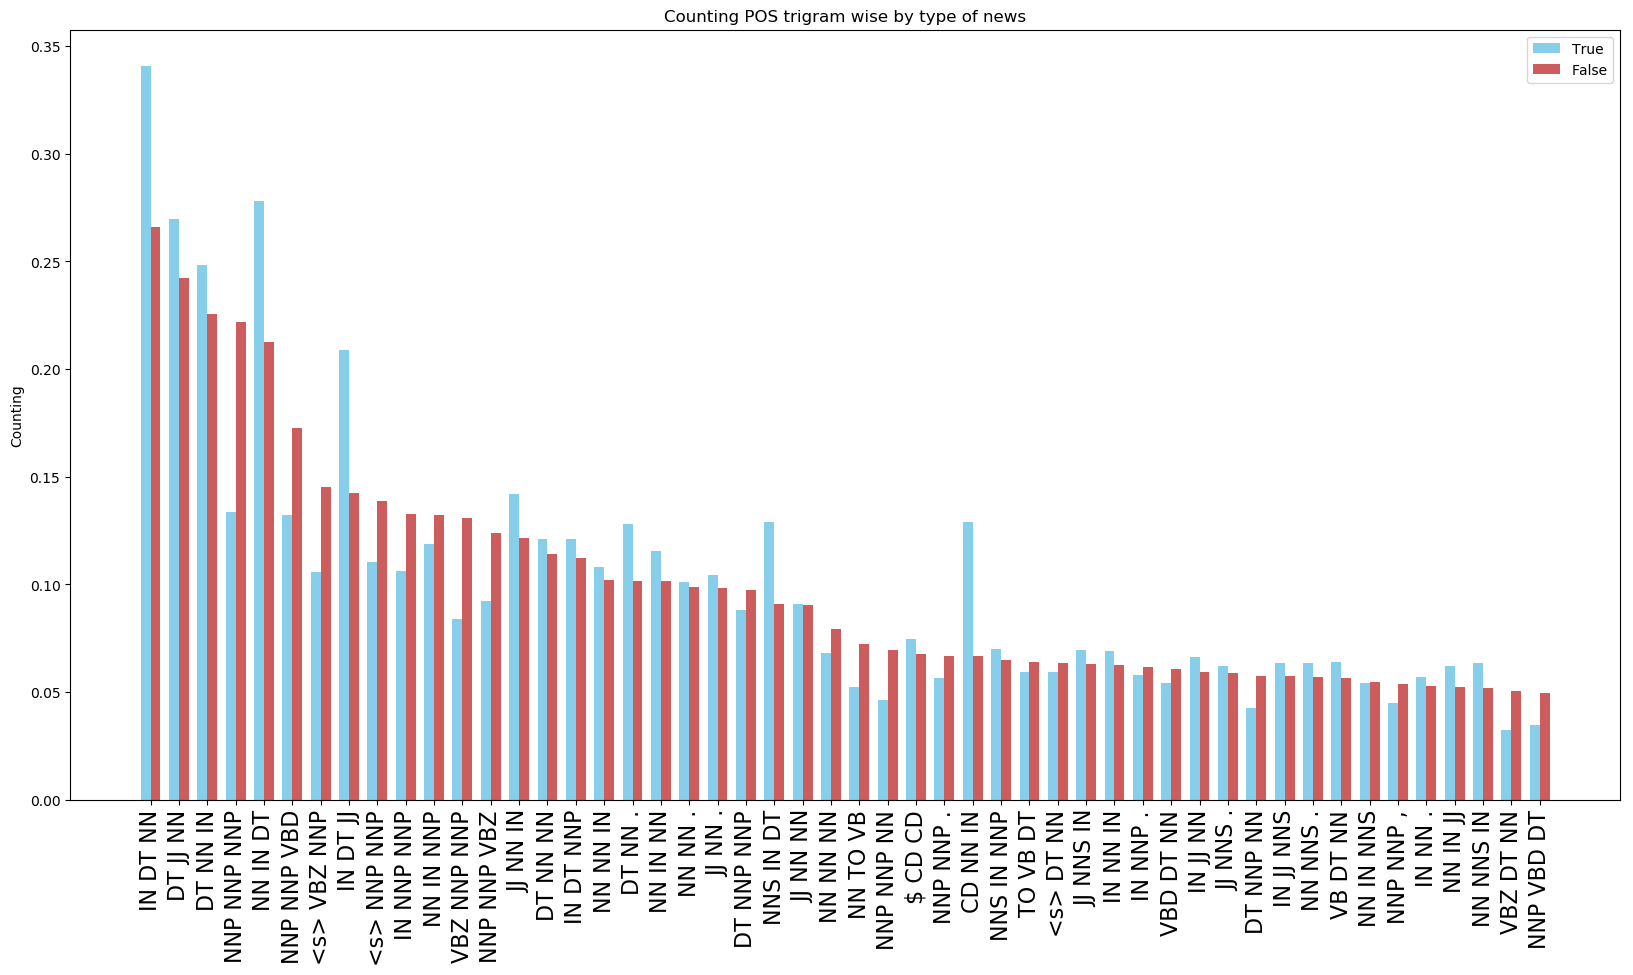

In [661]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_t_labels[:50]))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_t_values[:50], width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_t_values[:50], width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS trigram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_t_labels[:50]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

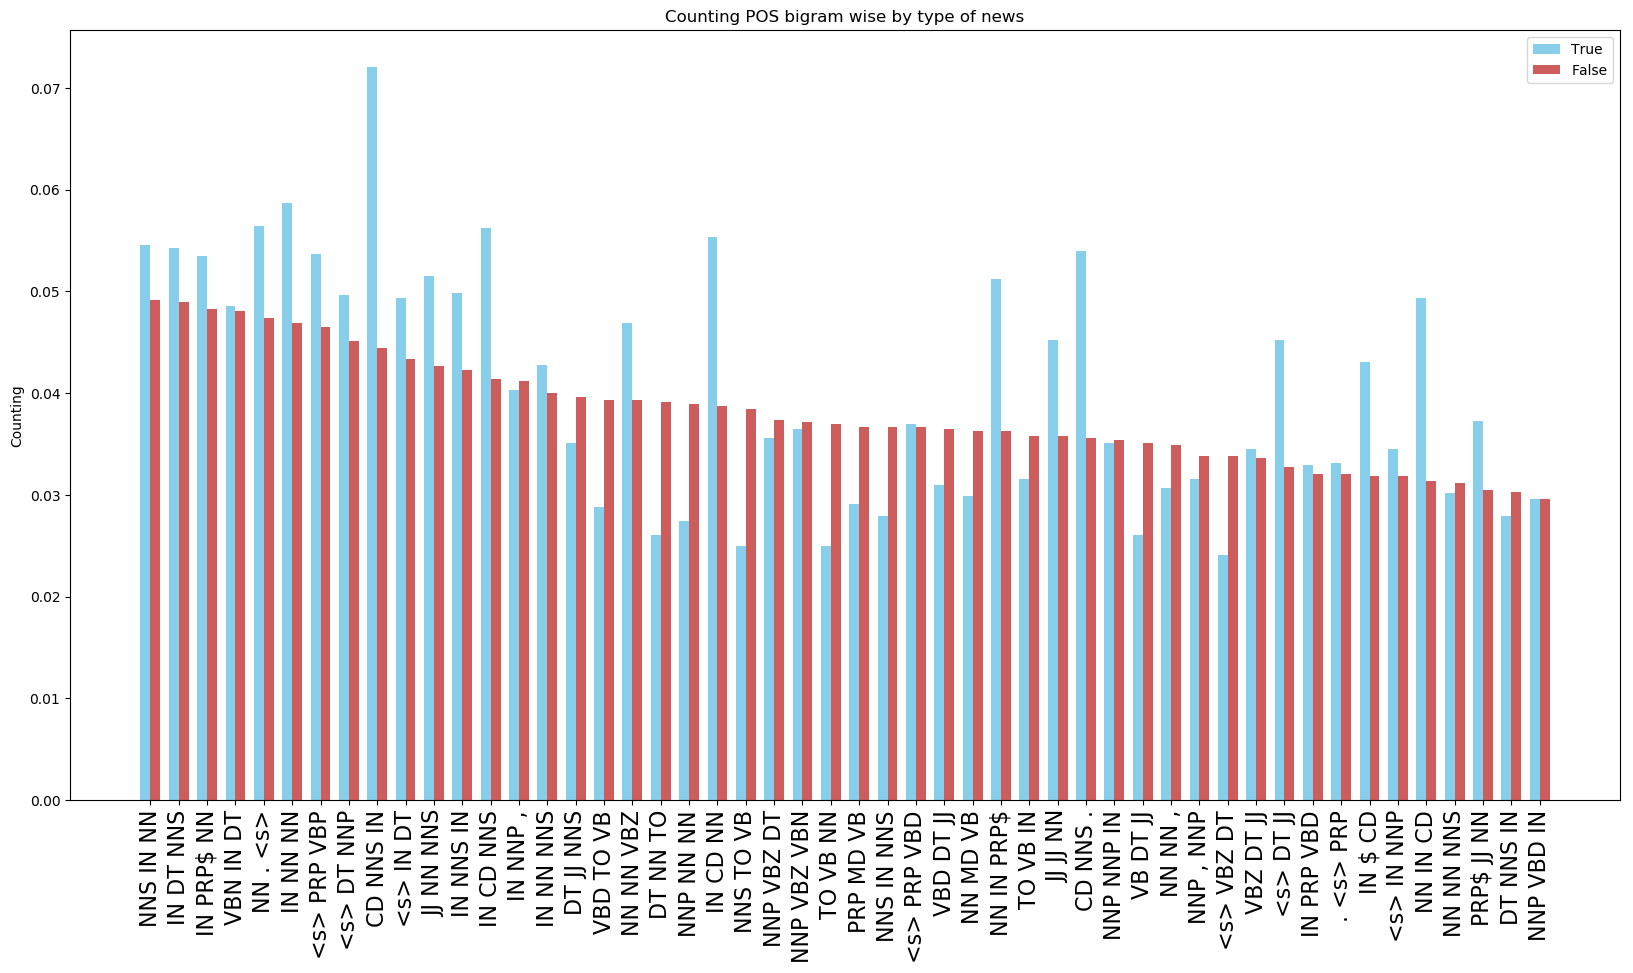

In [663]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_t_labels[50:100]))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_t_values[50:100], width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_t_values[50:100], width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS bigram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_t_labels[50:100]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

# Plotting Fourgrams

In [664]:
# fourgram counts
y_false_f_values = list()
y_true_f_values = list()
x_f_labels = [x[1] for x in ordered_false_fourgrams[:300]]
for each_label in x_f_labels:
    y_false_f_values.append([x[0] for x in ordered_false_fourgrams if x[1]==each_label][0])
    y_true_f_values.append([x[0] for x in ordered_true_fourgrams if x[1]==each_label][0])

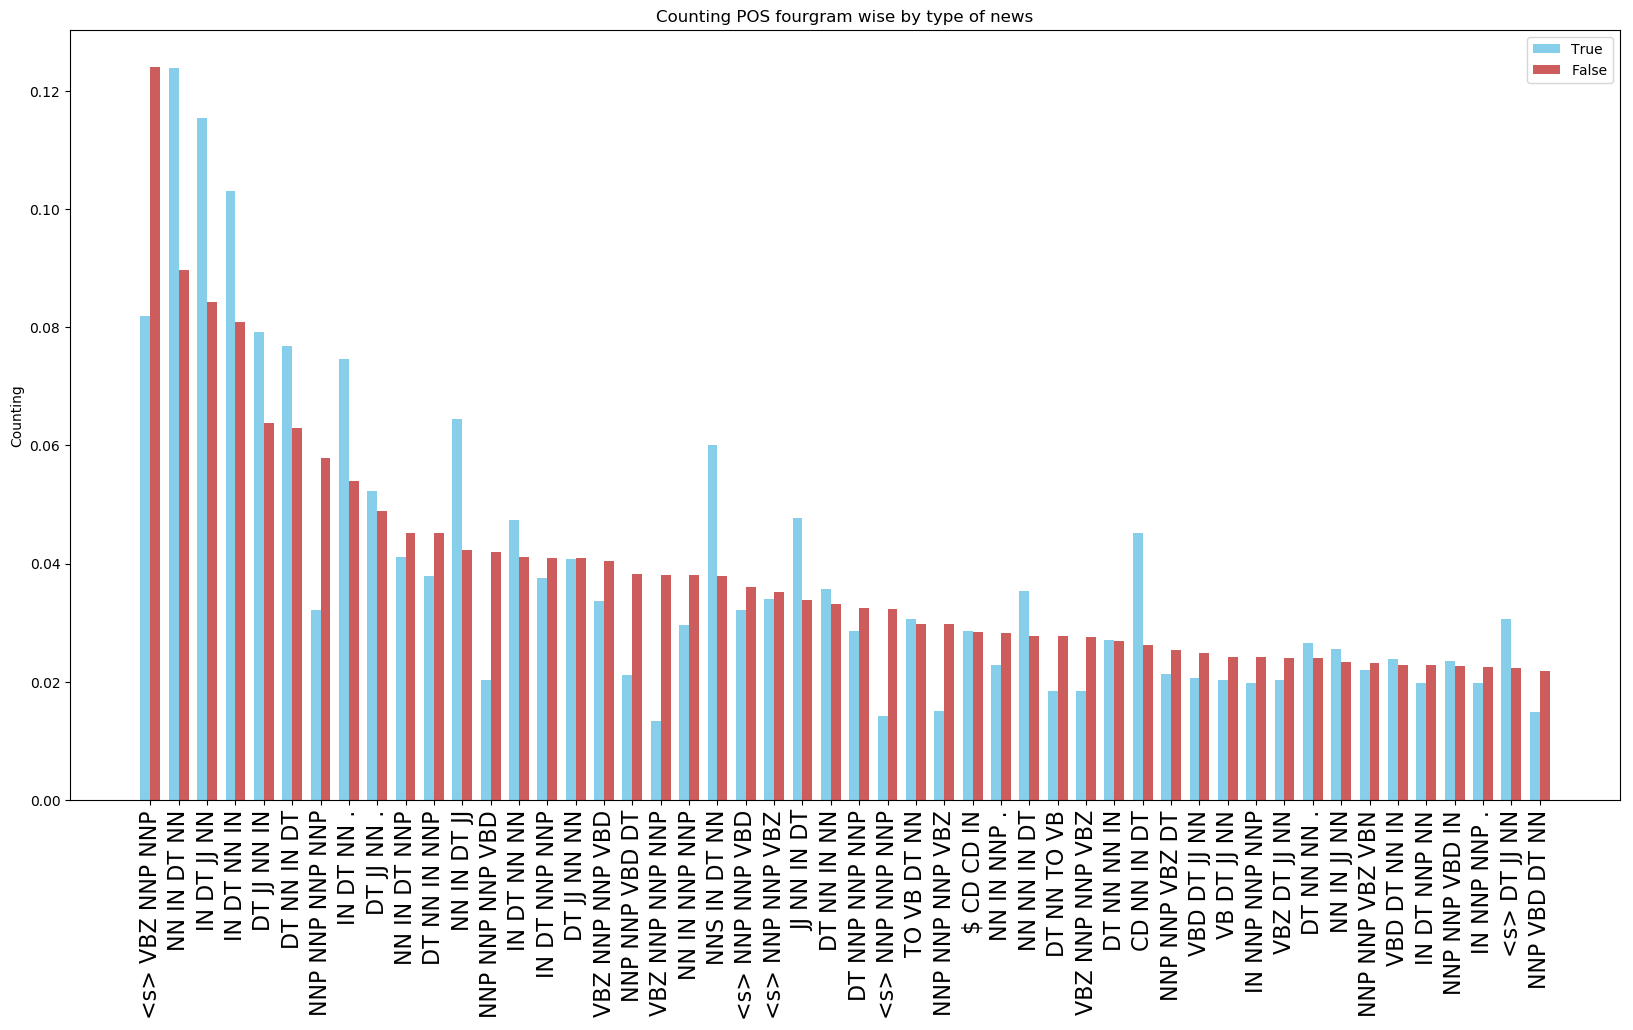

In [665]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_f_labels[:50]))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_f_values[:50], width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_f_values[:50], width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS fourgram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_f_labels[:50]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

# Plotting Fivegrams

In [666]:
# fivegram counts
y_false_ff_values = list()
y_true_ff_values = list()
x_ff_labels = [x[1] for x in ordered_false_fivegrams[:300]]
for each_label in x_ff_labels:
    y_false_ff_values.append([x[0] for x in ordered_false_fivegrams if x[1]==each_label][0])
    y_true_ff_values.append([x[0] for x in ordered_true_fivegrams if x[1]==each_label][0])

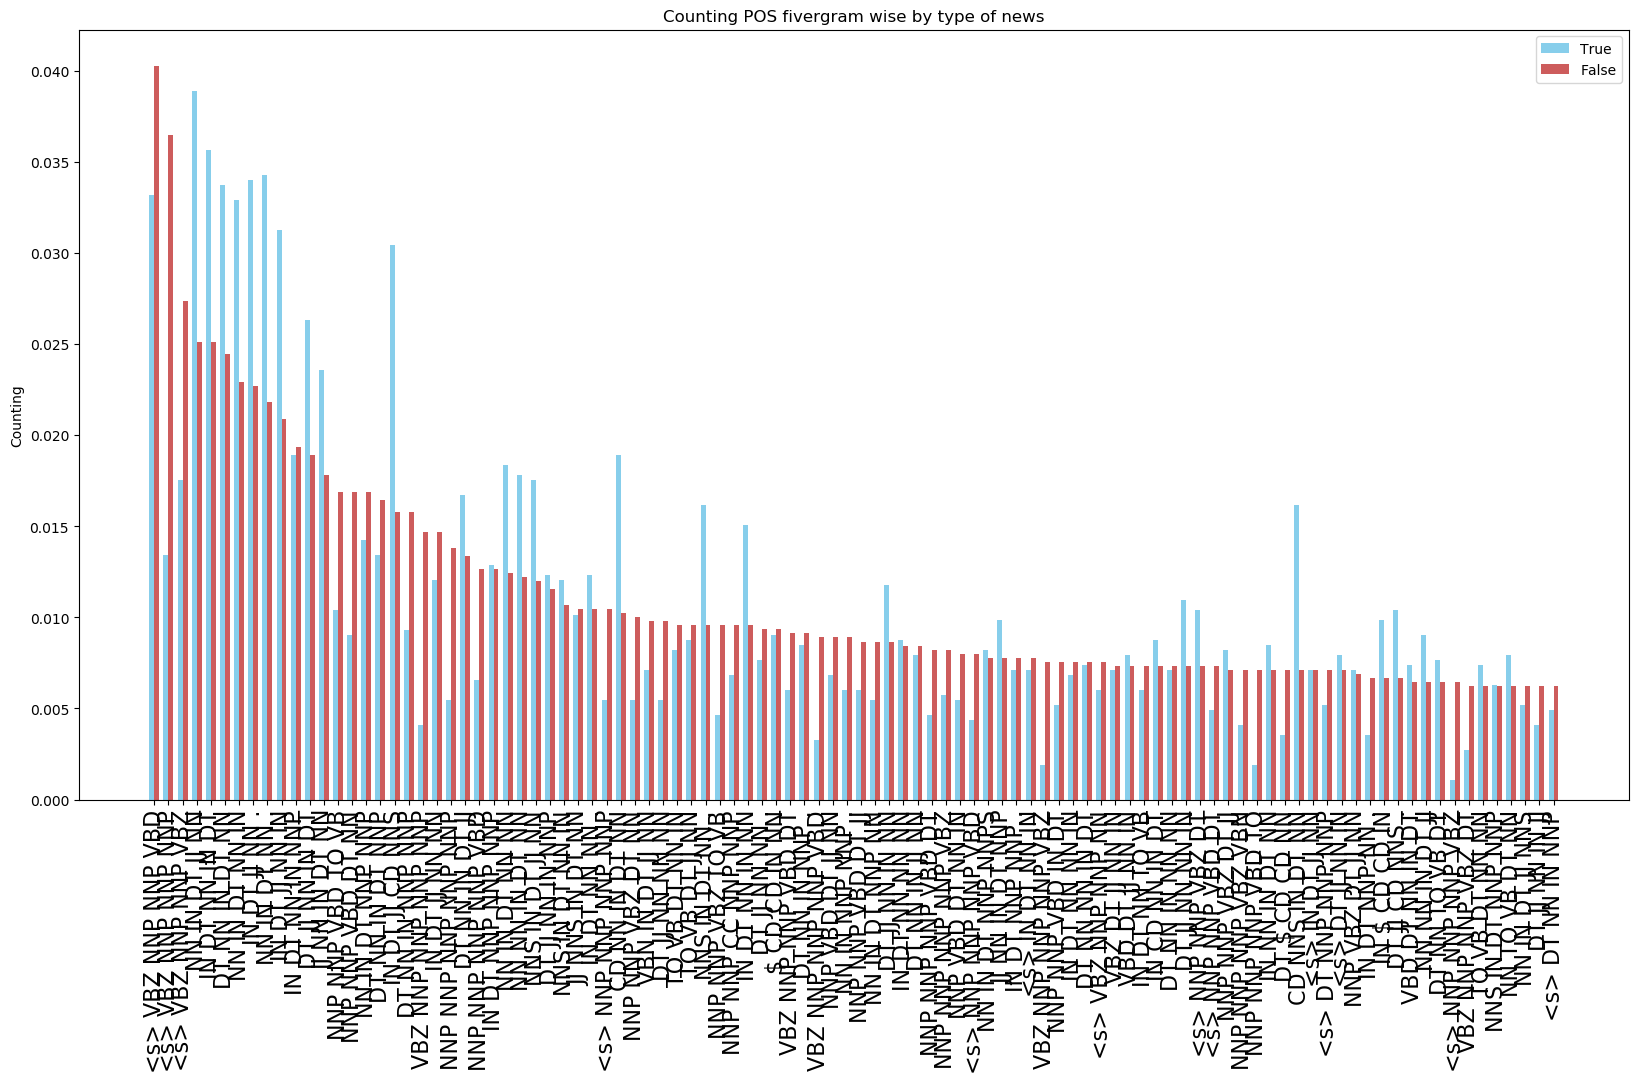

In [677]:
width = 0.35  # the width of the bars
ind = np.arange(len(x_ff_labels[:100]))
fig, ax = plt.subplots(figsize=(20, 10))
rects1 = ax.bar(ind - width/2, y_true_ff_values[:100], width,
                color='SkyBlue', label='True')
rects2 = ax.bar(ind + width/2, y_false_ff_values[:100], width,
                color='IndianRed', label='False')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counting')
ax.set_title('Counting POS fivergram wise by type of news')
ax.set_xticks(ind)
ax.set_xticklabels((x_ff_labels[:100]),fontsize=16)
ax.legend()
plt.xticks(rotation=90)
plt.show()

In [864]:
X_fivegrams = [x for i,x in enumerate(data_dict['pos_fivegrams']) if data_dict['redistributed_labels'][i] in ['true','false']]
Y = [1 if x=='false' else -1 for x in data_dict['redistributed_labels'] if x in ['true','false']]

In [865]:
X_fivegram_elements = x_ff_labels[100:150]
X_fivegram_vectors = np.zeros((len(X_fivegrams), len(X_fivegram_elements)))
for index,each_sentence in enumerate(X_fivegrams):
    for each_fivegram in each_sentence:
        if each_fivegram in X_fivegram_elements:
            X_fivegram_vectors[index][[i for i,x in enumerate(X_fivegram_elements) if x == each_fivegram][0]] += 1

In [874]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()


In [875]:
clf = clf.fit(statement_uni_vectors, Y)

ValueError: Number of labels=8146 does not match number of samples=10269

In [857]:
predicts = clf.predict(X_fivegram_vectors)

In [858]:
np.mean(predicts == Y)

0.5731647434323595

In [862]:
v_predict = clf.predict(X_valid_fivegram_vectors)
np.mean(v_predict == Y_valid)

0.5816425120772947

In [867]:
from sklearn import svm
clf_svm = svm.SVC()
clf_svm.fit(X_fivegram_vectors, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [868]:
svm_pred = clf_svm.predict(X_fivegram_vectors)

In [869]:
np.mean(svm_pred == Y)

0.552909403388166

In [733]:
dev_data = pd.read_csv('..\\dataset\\valid.tsv', sep="\t")
#dev_data.columns =['id','labels','statement','subject','speaker','job','location','rol','x','xx','xxx','xxxx','xxxxxx','xxxxxxs']#

In [757]:
valid_dict =  dict()
valid_dict['ids'] = dev_data[['id']].values[:,0]
valid_dict['labels'] = dev_data[['labels']].values[:,0]
valid_dict['statements'] = dev_data[['statement']].values[:,0]

In [758]:
len(valid_dict['statements'])

1283

In [759]:
#fourgrams_pos_list = list()
valid_fivegrams_pos_list = list()
print('Procesing sentences')
for statement_id, statement in enumerate(valid_dict['statements']):
    output = nlp.annotate(statement, properties={
      'annotators': 'tokenize,pos',
      'outputFormat': 'json'
      })
    result_pos = list()
    #fourgrams_result = list()
    fivegrams_result = list()
    for o in output['sentences']:
        result_pos.append('<s>')
        for t in o['tokens']:
            result_pos.append('{0}'.format(t['pos']))
        for rpIndex, rp in enumerate(result_pos):
            #if rpIndex < len(result_pos)-3 and len(result_pos)>=4:
            #    fourgrams_result.append('{0} {1} {2} {3}'.format(rp, result_pos[rpIndex+1],result_pos[rpIndex+2],result_pos[rpIndex+3]))
            if rpIndex < len(result_pos)-4 and len(result_pos)>=5:
                fivegrams_result.append('{0} {1} {2} {3} {4}'.format(rp, result_pos[rpIndex+1],result_pos[rpIndex+2],result_pos[rpIndex+3], result_pos[rpIndex+4]))
    #fourgrams_pos_list.append(fourgrams_result)
    valid_fivegrams_pos_list.append(fivegrams_result)

Procesing sentences


In [760]:
valid_dict['fivegrams'] = valid_fivegrams_pos_list

In [761]:
valid_labels = list()
for labels in valid_dict['labels']:
    if labels in ['false','barely-true','pants-fire']:
        valid_labels.append('false')
    elif labels in ['half-true']:
        valid_labels.append('half-true')
    else:
        valid_labels.append('true')

In [762]:
valid_dict['new_labels'] = valid_labels
len(valid_dict['new_labels'])

1283

In [860]:
X_valid_fivegrams = [x for i,x in enumerate(valid_dict['fivegrams']) if valid_dict['new_labels'][i] in ['true','false']]
Y_valid = [1 if x=='false' else 0 for x in valid_dict['new_labels'] if x in ['true','false']]

In [861]:
X_valid_fivegram_elements = x_ff_labels[:50]
X_valid_fivegram_vectors = np.zeros((len(X_valid_fivegrams), len(X_fivegram_elements)))
for index,each_sentence in enumerate(X_valid_fivegrams):
    for each_fivegram in each_sentence:
        if each_fivegram in X_valid_fivegram_elements:
            X_valid_fivegram_vectors[index][[i for i,x in enumerate(X_valid_fivegram_elements) if x == each_fivegram][0]] += 1

In [880]:
unique_unigram_count = [len(np.unique(x)) for x in data_dict['pos']]

In [978]:
number_of_jj = list()
number_of_npp = list()
number_of_start= list()
for index,pos in enumerate(data_dict['pos']):
    number_of_jj.append(len([x for x in pos if x=='JJ']))
    number_of_npp.append(len([x for x in pos if x=='NNP']))
    number_of_start.append(len([x for x in data_dict['pos_bigrams'][index] if x=='<s> VBZ']))

In [979]:
two_d_pos_sentences = np.zeros((len(unique_unigram_count),5))

for index, x in enumerate(unique_unigram_count):
        two_d_pos_sentences[index][0] = data_dict['word_count'][index]
        two_d_pos_sentences[index][1] = x
        two_d_pos_sentences[index][2] = number_of_jj[index]
        two_d_pos_sentences[index][3] = number_of_npp[index]
        two_d_pos_sentences[index][4] = number_of_start[index]

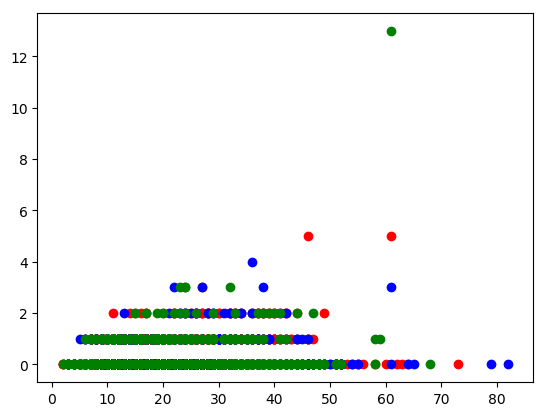

In [980]:
plot_y = np.array(data_dict['redistributed_labels'])
#plt.scatter(two_d_pos_sentences[:,0],two_d_pos_sentences[:,1])
plt.scatter(two_d_pos_sentences[plot_y=='false'][:,0],two_d_pos_sentences[plot_y=='false'][:,4],label='Class 1', c='red')
plt.scatter(two_d_pos_sentences[plot_y=='true'][:,0],two_d_pos_sentences[plot_y=='true'][:,4],label='Class 1', c='blue')
plt.scatter(two_d_pos_sentences[plot_y=='half-true'][:,0],two_d_pos_sentences[plot_y=='half-true'][:,4],label='Class 1', c='green')
plt.show()


In [7]:
[[5,2],[8,5]] in [[5,2],[2,5]]

False